# Exercise 5: Observation model


## 5.1 Implement model for perceiving landmarks

Consider a robot that operates in an environment populated by **range-only** sensors such as _beacons_.
These sensors transmit a signal that allows for obtaining noisy measurements of their distance from a receiver mounted on the robot.

The function `landmark_observation_model` realizes the observation model for perceiving landmarks with a range sensor. It takes as input:
 
- the observed noisy range $z$
- the standard deviation of the measurement $\sigma_z$ (zero-mean Gaussian noise)
- the position of the robot in the map $x$
- the position of the transmitting beacon in the map $b$

The output of this function is the probability $p(z | x, m)$ that the measurement $z$ was obtained at position $x$.

Implement the `landmark_observation_model` function and verify that it is correct for some test input. **[2.0]**

---

## 5.2 Compute likelihood of measurement in the environment

The robot operates in an environment that is represetend by a 20x20 grid map and contains a beacon at position $b_1 = [0,0]$ (top-left corner). 

The robot obtains a range measurement of the beacon $z_1 = 10$ and the sensor noise is $\sigma_{z1} = 1$.

Compute the `landmark_observation_model` at each cell of the environment and plot the likelihood of the observation over the environment. **[1.0]** 

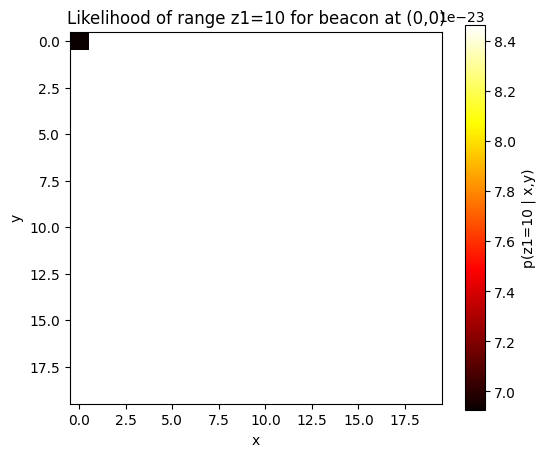

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ex5 import landmark_observation_model

# 5.2 parameters
grid_size = 20
b1 = (0, 0)       # beacon at top-left
z1 = 10           # observed range
sigma_r1 = 1.0    # sensor noise std dev

# Prepare a 2D array to store the likelihood at each cell
likelihood_map = np.zeros((grid_size, grid_size))

# Compute the likelihood over the 20x20 grid
for i in range(grid_size):
    for j in range(grid_size):
        # (j, i) is the robot's position in (x_r, y_r) format
        p = landmark_observation_model(z1, (j, i), b1, sigma_r1)
        likelihood_map[i, j] = p

# Plot the likelihood map
plt.figure(figsize=(6,5))
plt.imshow(likelihood_map, origin='upper', cmap='hot')
plt.colorbar(label='p(z1=10 | x,y)')
plt.title('Likelihood of range z1=10 for beacon at (0,0)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


---

## 5.3 Multiple landmarks

Assume that we install two **additional** beacons in our environment:

- $b_2 = [0, 10]$
- $b_3 = [10, 0]$

from which we obtain the following observations:

- $z_2 = 5$ with $\sigma_{z2} = 3$
- $z_3 = 9$ with $\sigma_{z3} = 2$

Compute the `landmark_observation_model` at each cell of the environment considering the measurements from **all** beacons and plot the **joint** likelihood of the observations over the environment. **[2.0]** 

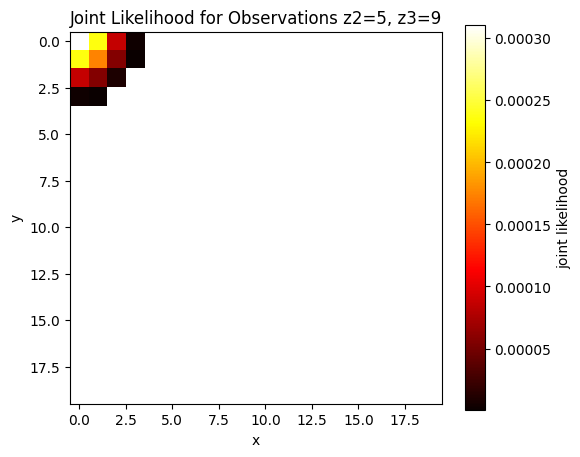

In [4]:
# 5.3 parameters
b2 = (0, 10)
b3 = (10, 0)
z2 = 5
sigma_r2 = 3.0
z3 = 9
sigma_r3 = 2.0

joint_map = np.zeros((grid_size, grid_size))

# Compute joint likelihood for each cell
for i in range(grid_size):
    for j in range(grid_size):
        # Robot pose (x_r, y_r) = (j, i)
        p2 = landmark_observation_model(z2, (j, i), b2, sigma_r2)
        p3 = landmark_observation_model(z3, (j, i), b3, sigma_r3)
        joint_map[i, j] = p2 * p3  # multiply the two probabilities

# Plot the joint likelihood map
plt.figure(figsize=(6,5))
plt.imshow(joint_map, origin='upper', cmap='hot')
plt.colorbar(label='joint likelihood')
plt.title('Joint Likelihood for Observations z2=5, z3=9')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
